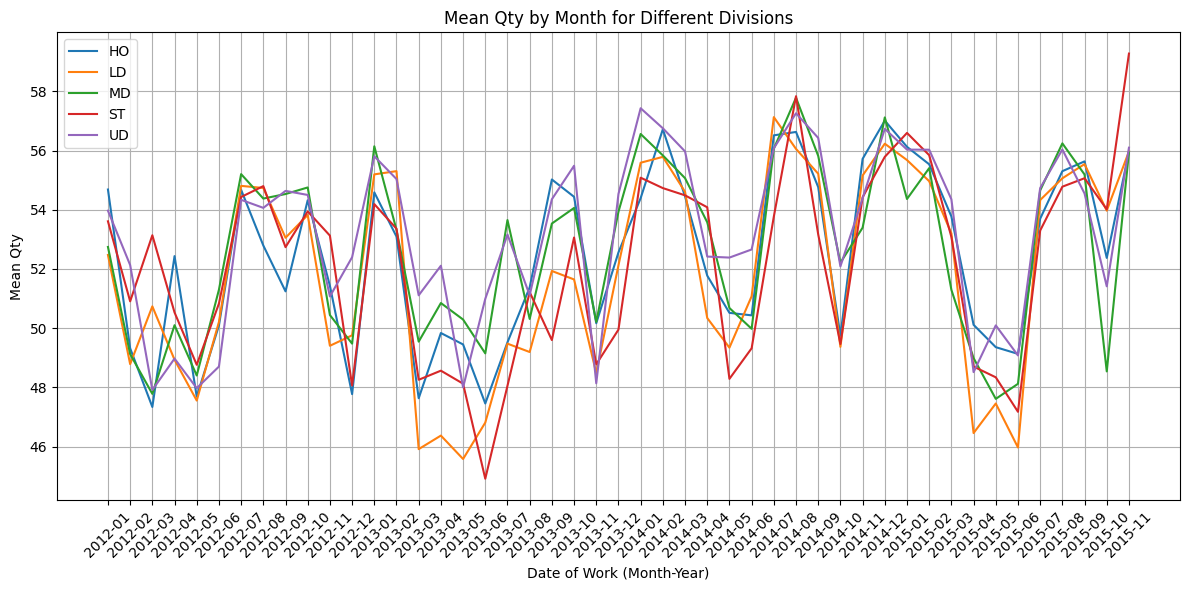

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/Merged_Employee_WorkDetails.csv")

# Convert the 'DateofWork' column to datetime
df['DateofWork'] = pd.to_datetime(df['DateofWork'])

# Convert the 'DateofWork' column to strings in the "Month-Year" format
df['DateofWork'] = df['DateofWork'].dt.strftime('%Y-%m')

# Group by 'Division' and 'DateofWork' and calculate the mean Qty
grouped = df.groupby(['Division', 'DateofWork'])['Qty'].mean().reset_index()

# Pivot the data to have divisions as columns
pivot_df = grouped.pivot(index='DateofWork', columns='Division', values='Qty')

# Create the multi-line chart
plt.figure(figsize=(12, 6))
for division in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[division], label=division)

# Set x-axis label and ticks
plt.xlabel("Date of Work (Month-Year)")
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel("Mean Qty")

# Show legend
plt.legend()

# Show the plot
plt.title("Mean Qty by Month for Different Divisions")
plt.grid(True)
plt.tight_layout()
plt.show()
